# ゼロから作る Deep Learning 学習ノート

## 1.5 NumPy による行列計算

下のコードで、$B$は2行2列の行列。$D$は2行3列の行列。  
`D.shape`で出力される結果は`(行, 列)` となっていて、普通の書き方と同じなのだが、ベクトルのときだけは変なので注意。  

$A$は1行2列のベクトル、$C$は2行1列のベクトルとして作っていて、`C.shape` の結果はそのようになっていて正しい。  
一方で`A.shape` の結果は`(2,)`のようになっていて、2行1列を示しているのかと思って混乱した。どうも `A = np.array([1,2])` のように定義した場合、numpy では行ベクトルか列ベクトルかは気にしないらしい。その証拠に、`np.dot(A,B)` と `np.dot(B,A)` のどちらも計算できてしまう。なお`dot`というのがNumPyでの通常の行列の計算。計算結果を見ると、`np.dot(A,B)`は

$\begin{pmatrix}1 &2\end{pmatrix}\cdot \begin{pmatrix}1 &2\\3 &4\end{pmatrix} = \begin{pmatrix}7 &10\end{pmatrix}$

をやっていて、`np.dot(B,A)`は

$\begin{pmatrix}\begin{pmatrix}1 &2\\3 &4\end{pmatrix} \cdot \begin{pmatrix}1 &2\end{pmatrix}^T\end{pmatrix}^T= \begin{pmatrix}5 &11\end{pmatrix}$

をやっているっぽい。  

これは気持ち悪いので、`A2 = np.array([[1,2]])` とすれば行ベクトルであることを明示できることを発見した。  


`A*B` は NumPy のブロードキャストという機能で、`A`と`B`の形が違くても謎の計算してくれる。片方がスカラーの場合は全要素がスカラー倍されるだけなのでわかりやすいが、それ以外の場合はちょっと動作が気持ち悪い (7.2.6 を読むと便利なのが分かる)。やってることとしては、まず2行2列の$B$に合わせて、$A = (1\, 2)$ を以下のように無理やり拡張する。  

$A' = \begin{pmatrix}1 &2\\1 &2\end{pmatrix}$

次に$A'$と$B$それぞれの同じ場所の要素同士の積を新たな行列の要素とする。

$A'\circ B = \begin{pmatrix}1*1 &2*2\\1*3 &2*4\end{pmatrix}$

この積は Wikipedia 「行列の積」を見たら、Hadamart 積というらしい。

- http://buzzard.ups.edu/courses/2007spring/projects/million-paper.pdf

によると応用例が

- http://www.ams.org/books/psapm/040/

に載ってるらしい。画像処理のフィルターをかけるときはこれを使うと良い。

In [1]:
import numpy as np

A = np.array([1,2])
B = np.array([[1,2],[3,4]])
C = np.array([[1],[2]])
D = np.array([[1, 2], [3,4], [5,6]])
A2 = np.array([[1,2]])


print(A.shape)
print(B.shape)
print(C.shape)
print(D.shape)
print(A2.shape)
print(A*B)
print(np.dot(A,B))
print(np.dot(B,A))
print(np.dot(B, C))

(2,)
(2, 2)
(2, 1)
(3, 2)
(1, 2)
[[1 4]
 [3 8]]
[ 7 10]
[ 5 11]
[[ 5]
 [11]]


### 1.6 Matplotlib の使い方

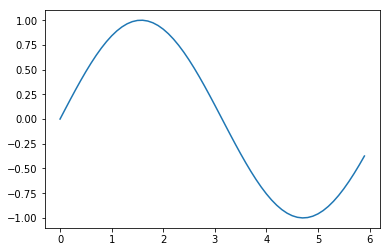

In [2]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0, 6, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()

## 4.5 学習アルゴリズムの実装

### 4.5.1 2層ニューラルネットワークのクラス

In [3]:
import numpy as np

# 作ったクラスをインポートして呼び出す
import two_layer_net as tl

#input_size = 784
input_size = 80
hidden_size = 100
output_size = 10
net = tl.TwoLayerNet(input_size, hidden_size, output_size)

#パラメータのチェック (行列の形)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

# 推論処理
x = np.random.rand(100, input_size) # ダミーの入力データ100枚分
t = np.random.rand(100, output_size) # ダミーの正解ラベル
y = net.predict(x)# 伝播を計算


# 勾配の計算 
grads = net.numerical_gradient(x, t) # 勾配を計算(時間がかかる)

print("hello")
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)




(80, 100)
(100,)
(100, 10)
(10,)
hello
(80, 100)
(100,)
(100, 10)
(10,)


### 5.4.1, 5.4.2 乗算レイヤと加算レイヤの実装

In [4]:
# 乗算レイヤ
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
      
    # 順伝播
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x*y
        
        return out
    
    #逆伝播
    def backward(self, dout): # dout は出力の微分
        dx = dout * self.y # xとyを入れ替えてかける
        dy = dout * self.x
        
        return dx, dy
    
class AddLayer:
    def __init__(self):
        pass ## 何もしない
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1.0
        dy = dout * 1.0
        return dx, dy
    
    
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

#レイヤーをつくる
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()


#順伝播
apple_price = mul_apple_layer.forward(apple, apple_num) # ノード1
orange_price = mul_orange_layer.forward(orange, orange_num) # ノード2
all_price = add_apple_orange_layer.forward(apple_price, orange_price) #ノード3
price = mul_tax_layer.forward(all_price, tax) #ノード4

#逆伝播
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) # ノード4
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price) #ノード3
dorange, dorange_num = mul_orange_layer.backward(dorange_price) #ノード2
dapple, dapple_num = mul_apple_layer.backward(dapple_price) #ノード1

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)   

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


### 6.2.2 隠れ層のアクティベーション分布

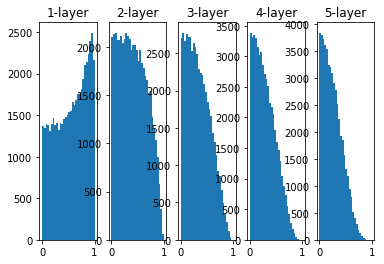

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): #シグモイド
    return 1/(1+np.exp(-x))

x = np.random.randn(1000, 100) # 1000個のデータをガウシアンでランダムにつくる

node_num = 100 # 各隠れ層のノード数
hidden_layer_size = 5 # 隠れ層が5層
activations = {} # アクティベーションの結果を格納する配列

for i in range(hidden_layer_size): #5個の隠れ層について実行
    if i != 0: # 2回目以降はxに前回の結果を代入
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1 # 重みの初期値の設定
   # w = np.random.randn(node_num, node_num) * 0.01 # 重みの初期値の設定
    node_num = 100
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) # Xavier の初期値
    # 本来は前層のノードの数の平方根で割るが、今の場合は全ての層が100個
    
    z = np.dot(x, w) # 重み x データ
    #a = sigmoid(z)
    a = np.tanh(z) # シグモイドの代わりにtanhを用いる
    activations[i] = a
    
# ヒストグラムを描画

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

                

### 7.4.2 im2col
データを畳み込み演算ごとの行列にしてくれる関数。下の例は、3ch 7x7 の画像のようなデータに対して、5x5のフィルターをストライド1でかけていく場合。  
im2colによってデータが行として展開されたので、これとフィルターを列として展開したものとの内積をとれば演算ができる。フィルターの整形には `reshape(??, -1)` という便利機能を使う(p. 226 参照)  
また、演算後は `transpose` 関数を使って整形する。  
逆伝播のときは `col2im` を使う。

In [6]:
import sys, os
import numpy as np

def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """
    パラメター
    input_data : 入力データ（データ数、チャンネル、高さ、幅の4次元配列）
    filter_h : フィルターの高さ
    filter_w : フィルターの幅
    stride : ストライド
    pad : パディング
    
    返り値
    col : 2次元配列
    """
    
    N, C, H, W = input_data.shape
    # // は整数の除算
    out_h = (H + 2*pad - filter_h) // stride + 1
    out_w = (W + 2*pad - filter_w) // stride + 1
    
    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))
    
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
            
    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7) # 10個のデータ
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)
